In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
df.shape

(577, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


filling missing values

In [30]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [31]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [32]:
df['Cabin'] = df['Cabin'].fillna('U')


In [33]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [36]:
categorical_features=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
for i in categorical_features:
  df[i]=df[i].astype('category')

In [37]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,category
Sex,category
Age,float64
SibSp,int64
Parch,int64
Ticket,category
Fare,float64


In [43]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02,577.000000,577.000000
mean,450.590988,0.299827,2.502600,0.752166,0.003305,-0.293706,-4.736736e-01,-0.347884,1.611785
std,259.568357,0.458579,0.733909,0.432129,0.655420,0.403796,2.777966e-16,0.253828,0.718119
min,1.000000,0.000000,1.000000,0.000000,-1.900705,-0.474545,-4.736736e-01,-0.648422,0.000000
25%,222.000000,0.000000,2.000000,1.000000,-0.438572,-0.474545,-4.736736e-01,-0.491874,2.000000
50%,455.000000,0.000000,3.000000,1.000000,0.000000,-0.474545,-4.736736e-01,-0.474005,2.000000
75%,676.000000,1.000000,3.000000,1.000000,0.215540,-0.474545,-4.736736e-01,-0.329287,2.000000
max,891.000000,1.000000,3.000000,1.000000,1.870059,1.340132,-4.736736e-01,0.583318,2.000000


encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


feature scaling

In [40]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Standardize
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


detecting outliers

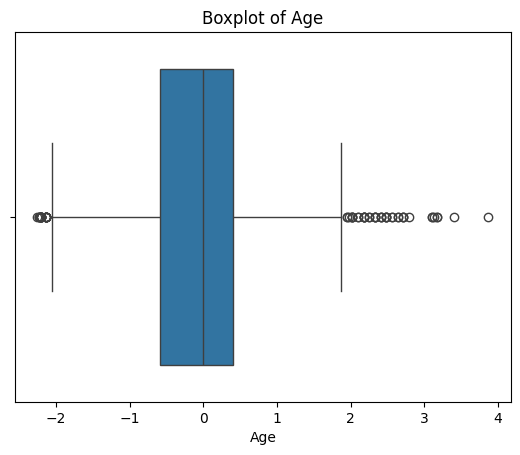

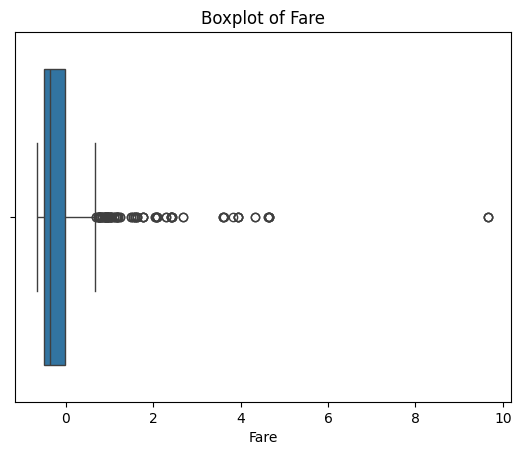

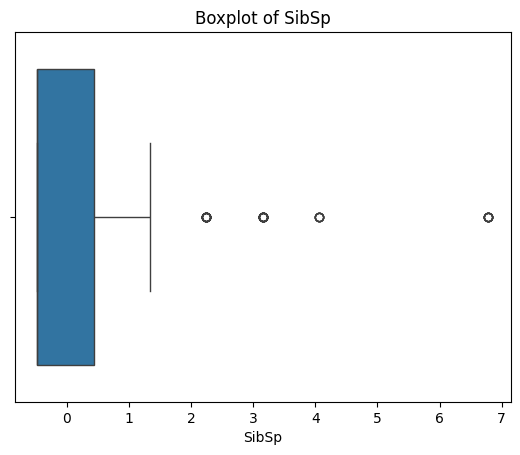

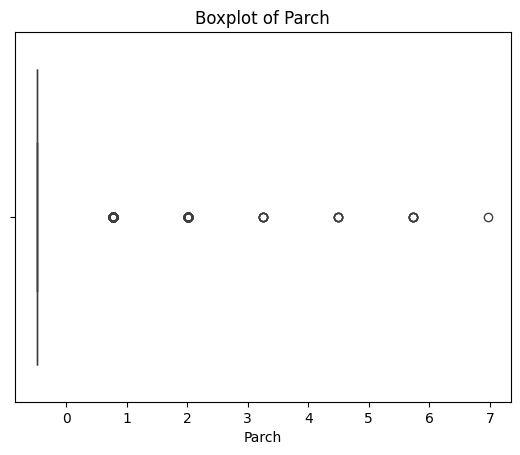

In [41]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers using IQR


In [42]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]